## Simple OOP example with Linear Regression
### Inspired by Dr. Tirthajyoti Sarkar, Fremont, CA 94536


In [1]:
import numpy as np

### A very simple class `MyLinearRegression`

In linear regression we try and compute optimal parameters/coefficients such that the model
$$
x_i^Tw+b
$$
best describes observed data. Here $x_i$ is a data vector and $b$ is the so-called intercept. Given now many data vectors $x_i$ these can be collected into a matrix $\tilde X$ and to account for the intercept the machine learning community in order to compute both the weights $w$ and the intercept $b$ considers the following matrix
$$
X=
\begin{bmatrix}
1&x_{11}&\ldots&x_{1d}\\
1&x_{21}&\ldots&x_{2d}\\
\vdots&\ldots&\ldots&\ldots\\
1&x_{n1}&\ldots&x_{nd}\\
\end{bmatrix}
$$
and we solve for the coefficient vector 
$
\beta=
\begin{bmatrix}
b\\
w\\
\end{bmatrix}$.
Given a vector of data points $y$ we now solve the problem of minimizing
$$
\Vert X\beta-y\Vert_{2}^2
$$
with the explicit solution given by
$$
\beta^{*}=(X^TX)^{-1}X^Ty.
$$
The following class realizes the solution of this problem.

In [2]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

---
### Create an instance and check attributes

In [3]:
mlr = MyLinearRegression()

In [4]:
mlr._fit_intercept

True

In [5]:
mlr.coef_==None

True

In [6]:
mlr.intercept_ == None

True

In [7]:
print(mlr)

---
### Built-in description method
We can add a special built-in method `__repr__` to create a short description string

In [8]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"

In [9]:
mlr = MyLinearRegression()

In [10]:
print(mlr)

I am a Linear Regression model!


---
### Adding the `fit` method
Now, we can add the core fitting method called `fit`. This uses linear algebra routines from NumPy to solve a linear regression (single or multi-variate) problem.

In [11]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array (single or multivariate)
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X] #arrays will be stacked along their last axis after being upgraded to at least 2-D -> get matrix X from beginning
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy) #gives beta* vector as solution
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0] #first entry from beta*
            self.coef_ = coef[1:] #all other entrys starting with the second entry
        else:
            self.intercept_ = 0
            self.coef_ = coef

---
### Generate some random data for test

In [12]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20) #our entrys with bias
#y = 10*np.random.random(size=(20,1)) #this would be randomeness
print(X)
print(X.T[0])

[[5.67306631 6.60625206]
 [7.54415433 4.59480628]
 [7.77516499 9.96785478]
 [6.80336098 7.67899223]
 [8.3210026  8.10125183]
 [3.66415331 7.64227631]
 [1.16131959 5.92067341]
 [5.87512628 2.50983031]
 [8.1230284  4.06334408]
 [1.24440953 9.58407954]
 [8.90601029 1.98277048]
 [1.0550045  9.25628158]
 [4.41105139 4.02761545]
 [9.49276064 3.5723467 ]
 [5.46366505 2.6253048 ]
 [6.29199336 8.2848656 ]
 [8.47435889 1.52299149]
 [9.99389857 5.20539577]
 [5.58753655 3.92840377]
 [5.65388452 5.5183319 ]]
[5.67306631 7.54415433 7.77516499 6.80336098 8.3210026  3.66415331
 1.16131959 5.87512628 8.1230284  1.24440953 8.90601029 1.0550045
 4.41105139 9.49276064 5.46366505 6.29199336 8.47435889 9.99389857
 5.58753655 5.65388452]


In [13]:
import matplotlib.pyplot as plt

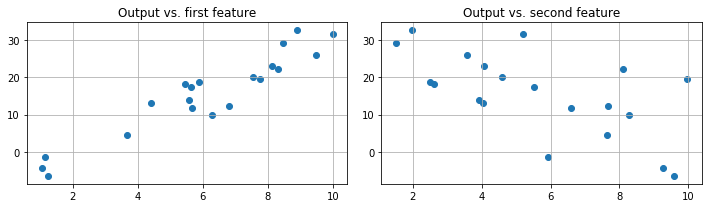

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X.T[0],y) #X.T[0] is the first column of X transposed into a row
ax[0].set_title("Output vs. first feature")
ax[0].grid(True)
ax[1].scatter(X.T[1],y)
ax[1].set_title("Output vs. second feature")
ax[1].grid(True)

fig.tight_layout()
plt.show()

---
### Instantiate a new `MyLinearRegression` object and fit the data

In [15]:
mlr = MyLinearRegression()

In [16]:
print("We have not fitted the data yet. There is no regression coefficients")
print("Regression coefficients:", mlr.coef_)

We have not fitted the data yet. There is no regression coefficients
Regression coefficients: None


In [17]:
mlr.fit(X,y)

In [18]:
print("We have fitted the data. We can print the regression coefficients now")
print("Regression coefficients:", mlr.coef_)

We have fitted the data. We can print the regression coefficients now
Regression coefficients: [ 3.42066566 -1.20510784]


In [19]:
print("The intercept term is given by: ", mlr.intercept_) #first term of beta*

The intercept term is given by:  1.613440854910749


---
### Comparison of ground truth and fitted values
Woudn't it be nice to compare the ground truth with the predictions and see how closely they fit

In [20]:
coef_ = mlr.coef_
y_pred = np.dot(X,coef_)+mlr.intercept_

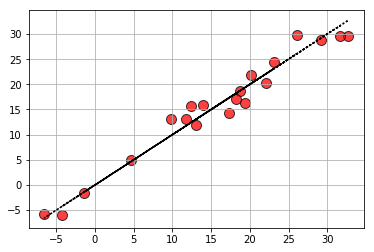

In [21]:
plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()

# Extension
Add the plotting as a method to our class!

In [22]:
class MyLinearRegression:
    
    def __init__(self, y, fit_intercept=True):
        self.y = y
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array (single or multivariate)
        y: 1D numpy array
        """
        y = self.y
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X] #arrays will be stacked along their last axis after being upgraded to at least 2-D -> get matrix X from beginning
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, self.y)
        coef = np.dot(inverse_xTx, xTy) #gives beta* vector as solution
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0] #first entry from beta*
            self.coef_ = coef[1:] #all other entrys starting with the second entry
        else:
            self.intercept_ = 0
            self.coef_ = coef
    
    def plot(self):
        y_pred = np.dot(X,self.coef_)+ self.intercept_
        plt.scatter(self.y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
        plt.plot(self.y,self.y,c='k',linestyle='dotted')
        plt.grid(True)
        plt.show()

Now create a data set of your choice and apply the fit and plot method of our class on it.

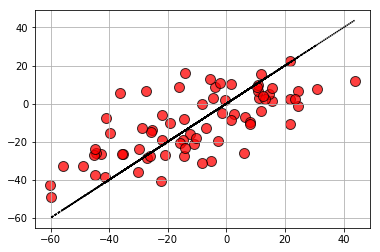

In [23]:
X = 15*np.random.random(size=(75,2))
y = 2.3*X.T[0]-4*X.T[1]+17*np.random.randn(75)
mlr = MyLinearRegression(y)
mlr.fit(X)
mlr.plot()